In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog, linprog
import seaborn as sns


In [2]:
# Load the dataset
file_path = r"C:\Users\sn408\Downloads\archive (2)\Historical Product Demand.csv"
data = pd.read_csv(file_path)

# Display the first 10 rows
data.head(10)


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500
5,Product_0979,Whse_J,Category_028,2012/4/19,500
6,Product_0979,Whse_J,Category_028,2012/6/5,500
7,Product_0979,Whse_J,Category_028,2012/6/27,500
8,Product_0979,Whse_J,Category_028,2012/7/23,500
9,Product_0979,Whse_J,Category_028,2012/8/29,500


In [5]:
# Display dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1048575 non-null  object
 1   Warehouse         1048575 non-null  object
 2   Product_Category  1048575 non-null  object
 3   Date              1037336 non-null  object
 4   Order_Demand      1048575 non-null  object
dtypes: object(5)
memory usage: 40.0+ MB


In [6]:
data.describe()


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,1048575,1048575,1048575,1037336,1048575
unique,2160,4,33,1729,3828
top,Product_1359,Whse_J,Category_019,2013/9/27,1000
freq,16936,764447,481099,2075,112682


In [7]:
# Check for missing values
data.isnull().sum()

Product_Code            0
Warehouse               0
Product_Category        0
Date                11239
Order_Demand            0
dtype: int64

In [8]:
# Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Display the first few rows to confirm the change
data.head()


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [9]:
# Clean 'Order_Demand' column by removing non-numeric characters
data['Order_Demand'] = data['Order_Demand'].str.replace('[^0-9.-]', '', regex=True).astype(float)

# Check for NaN values in 'Order_Demand' after conversion
data['Order_Demand'].isnull().sum()


0

In [10]:
# Fill missing values in 'Order_Demand' with 0
data['Order_Demand'].fillna(0, inplace=True)

# Confirm no missing values remain
data['Order_Demand'].isnull().sum()


C:\Users\sn408\AppData\Local\Temp\ipykernel_4248\932731618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Order_Demand'].fillna(0, inplace=True)


0

<Axes: xlabel='Warehouse', ylabel='count'>

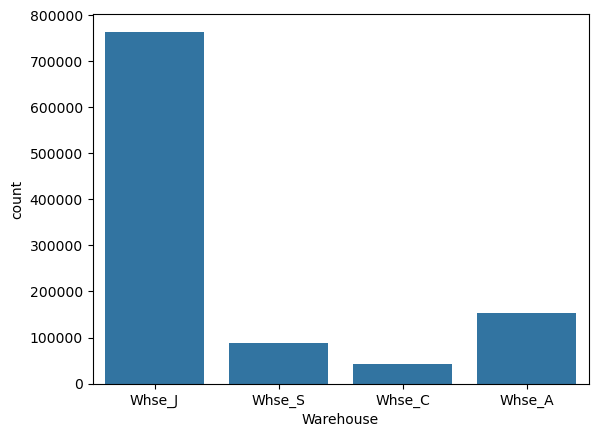

In [13]:
sns.countplot(x='Warehouse' , data = data)

In [11]:
# Group by 'Warehouse' and calculate total demand
Warehouse_Demand = data.groupby('Warehouse')['Order_Demand'].sum()

# Display the total demand for each warehouse
Warehouse_Demand


Warehouse
Whse_A    1.590368e+08
Whse_C    5.850714e+08
Whse_J    3.363200e+09
Whse_S    1.038025e+09
Name: Order_Demand, dtype: float64

C:\Users\sn408\AppData\Local\Temp\ipykernel_4248\3360304921.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Warehouse_Demand.index, y=Warehouse_Demand.values, palette='viridis')


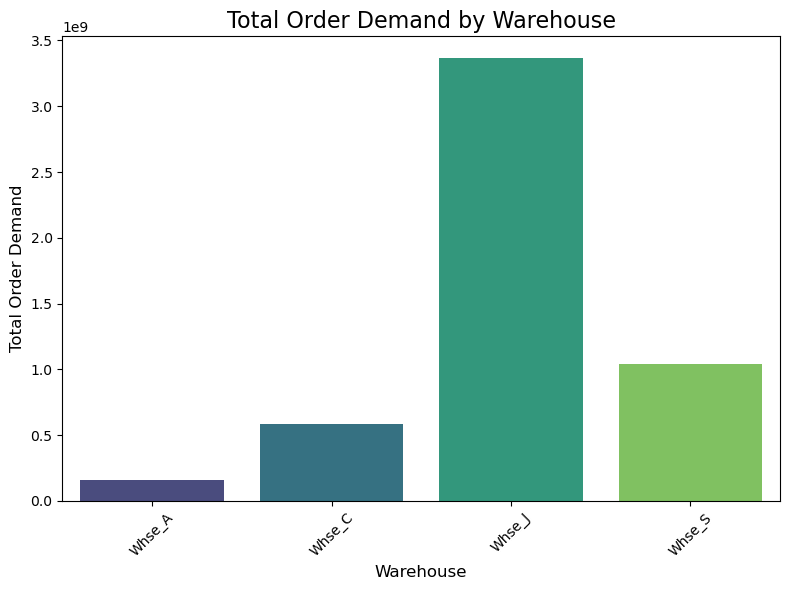

In [12]:
# Create a bar plot for total order demand by warehouse
plt.figure(figsize=(8, 6))
sns.barplot(x=Warehouse_Demand.index, y=Warehouse_Demand.values, palette='viridis')
plt.title('Total Order Demand by Warehouse', fontsize=16)
plt.xlabel('Warehouse', fontsize=12)
plt.ylabel('Total Order Demand', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
#avg demand 
demand = data['Order_Demand'].mean()
demand

4906.976917244832

In [15]:
#total demand 
initial_inventory = data['Order_Demand'].sum()
initial_inventory

5145333321.0

In [16]:
#max_inventory
max_inventory = initial_inventory*2
max_inventory

10290666642.0

In [17]:
# Example holding cost per unit per day
holding_cost = 2

# Example ordering cost per order
ordering_cost = 50

# Number of days to hold inventory
holding_days = 30

# Cost function
c = [holding_cost * holding_days + ordering_cost]
print(c)




[110]


In [18]:
# Constraints
A = [[-1], [1]]  # This constraint ensures that the order quantity x is at least equal to the average demand.
B = [-demand, max_inventory - initial_inventory]  # This ensures x does not exceed available capacity.
bounds = [(0, None)]  # This specifies that the order quantity x cannot be negative.

In [19]:
# SOLVING OPTIMIZATION PROBLEM 
x = linprog(c,A_ub=A,b_ub=B, bounds= bounds)
x

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 539767.4608969316
              x: [ 4.907e+03]
            nit: 0
          lower:  residual: [ 4.907e+03]
                 marginals: [ 0.000e+00]
          upper:  residual: [       inf]
                 marginals: [ 0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  5.145e+09]
                 marginals: [-1.100e+02 -0.000e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0

In [38]:
#optimal order quanity 
optimal_order_quantity = x.x[0]
total_cost = x.fun
optimal_order_quanity 


4906.976917244832

In [22]:
#SENSITIVISENSITIVITY ANALYSIS
#20% increase in demand 
demand_change = 1.2
#20% decrease in demand 
holding_cost_change = 0.8
#50% increase in demand 
lead_time_change=1.5

In [24]:
new_demand=demand*demand_change
new_holding_cost=holding_cost*holding_cost_change
new_lead_time=holding_days*holding_cost_change

In [26]:
new_demand

5888.372300693799

In [27]:
new_holding_cost

1.6

In [28]:
new_lead_time

24.0

In [29]:
# Define the sensitivity analysis function
def sensitivity_analysis(demand_change, holding_cost_change, lead_time_change):
    # Update the demand, holding cost, and lead time based on the changes
    new_demand = demand * demand_change
    new_holding_cost = holding_cost * holding_cost_change
    new_lead_time = holding_days * lead_time_change

    # Update the cost function
    new_c = [new_holding_cost * new_lead_time + ordering_cost]

    # Update constraints
    new_b = [-new_demand, max_inventory - initial_inventory]
    
    # Perform linear programming optimization
    new_x = linprog(new_c, A_ub=A, b_ub=new_b, bounds=bounds)
    new_optimal_order_quantity = new_x.x[0]
    new_total_cost = new_x.fun

    # Print results
    print("New optimal order quantity:", new_optimal_order_quantity)
    print("New total cost:", new_total_cost)

    # Return the results
    return new_optimal_order_quantity, new_total_cost



In [30]:
# Example usage of the function
optimal_order_quantity_sensitivity, total_cost_sensitivity = sensitivity_analysis(demand_change, holding_cost_change, lead_time_change)


New optimal order quantity: 5888.372300693799
New total cost: 718381.4206846434


In [31]:
# Display sensitivity analysis results
print("Sensitivity Analysis:")
print("Optimal Order Quantity:", optimal_order_quantity_sensitivity)
print("Total Cost:", total_cost_sensitivity)


Sensitivity Analysis:
Optimal Order Quantity: 5888.372300693799
Total Cost: 718381.4206846434


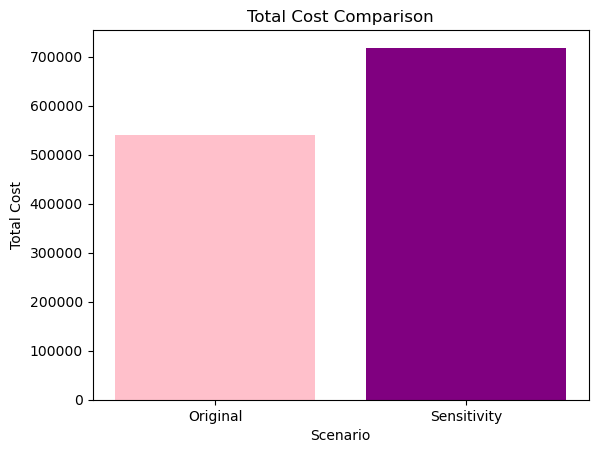

In [32]:
# Define labels for the bar chart
labels = ["Original", "Sensitivity"]

# Total costs for original and sensitivity analysis
total_costs = [total_cost, total_cost_sensitivity]

# Create a bar chart
plt.bar(labels, total_costs, color=['pink', 'purple'])

# Label the axes and title
plt.xlabel("Scenario")
plt.ylabel("Total Cost")
plt.title("Total Cost Comparison")

# Display the plot
plt.show()


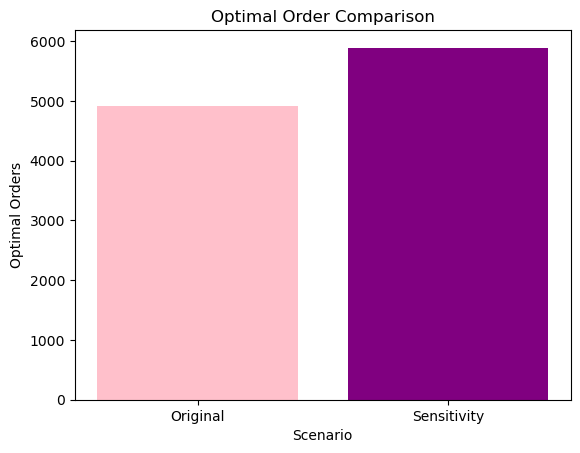

In [40]:
labels = ["Original", "Sensitivity"]
optimal_orders = [optimal_order_quantity, optimal_order_quantity_sensitivity]

# Create bar chart
plt.bar(labels, optimal_orders, color=['pink', 'purple'])
plt.xlabel("Scenario")
plt.ylabel("Optimal Orders")
plt.title("Optimal Order Comparison")

# Call plt.show() to display the chart
plt.show()
